# Computing Absolute and Relative Dispersion Statistics

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#000000; border-left: solid #000000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Objective: </b> Compute absolute and relative dispersion for every time step using the file produced with OpenDrift </p>
<p style='margin-left:1em;'>

</p>
<p style='margin-left:1em;'>
Dec - 2023 | Mireya M. Montano | mireya.mmor@gmail.com
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>

## Parameters needed

- file_list (str) List of OpenDrift files to analyse
- outdir (str) path of the directory where to save the output
- id (str) Unique identifier for the experiment. i.e. 'control', 'no_stranding', 'ns' 
- RD (boolean) If True it calculates the relative dispersion of the provided file. Default True
- AD (boolean) If True it calculates the absolute dispersion of the provided file. Default True

In [1]:
from glob import glob

id = "control"
file_list = sorted(glob(f"output/notebook_01/*01_Particles_{id}.nc"))
outdir = "output/notebook_04"


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#E49B0F; border-left: solid #FDDA0D 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
This script takes time as it calculates the distance for each time step of each particle as part of the relative and absolute dispersion definition. The time_step variable is given in seconds.
</p></span>
</div>


In [2]:
from Lagrangian_Analyses.get_dispersion_statistics import get_dispersion_statistics

abs_dispersion = get_dispersion_statistics(
    file_list,
    outdir,
    id,
    RD=False,
)

abs_dispersion.run()

INFO:root:--- Creating output directory


--- Generating output directory
--- Analysing output/notebook_01/200301_Particles_control.nc file 1/2
--- Calculating absolute dispersion for release location 1/11
--- Calculating absolute dispersion for release location 2/11
--- Calculating absolute dispersion for release location 3/11
--- Calculating absolute dispersion for release location 4/11
--- Calculating absolute dispersion for release location 5/11
--- Calculating absolute dispersion for release location 6/11
--- Calculating absolute dispersion for release location 7/11
--- Calculating absolute dispersion for release location 8/11
--- Calculating absolute dispersion for release location 9/11
--- Calculating absolute dispersion for release location 10/11
--- Calculating absolute dispersion for release location 11/11
--- Analysing output/notebook_01/200401_Particles_control.nc file 2/2
--- Calculating absolute dispersion for release location 1/11
--- Calculating absolute dispersion for release location 2/11
--- Calculating abso

In [3]:
from Lagrangian_Analyses.get_dispersion_statistics import get_dispersion_statistics

rel_dispersion = get_dispersion_statistics(
    file_list,
    outdir,
    id,
    AD=False,
)

rel_dispersion.run()

INFO:root:--- Creating output directory


--- Generating output directory
--- Analysing output/notebook_01/200301_Particles_control.nc file 1/2
--- Calculating relative dispersion for release location 1/11
--- Location 1: Cluster 1/9
--- Location 1: Cluster 2/9
--- Location 1: Cluster 3/9
--- Location 1: Cluster 4/9
--- Location 1: Cluster 5/9
--- Location 1: Cluster 6/9
--- Location 1: Cluster 7/9
--- Location 1: Cluster 8/9
--- Location 1: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 2/11
--- Location 2: Cluster 1/9
--- Location 2: Cluster 2/9
--- Location 2: Cluster 3/9
--- Location 2: Cluster 4/9
--- Location 2: Cluster 5/9
--- Location 2: Cluster 6/9
--- Location 2: Cluster 7/9
--- Location 2: Cluster 8/9
--- Location 2: Cluster 9/9
--- Calculating relative dispersion for release location 3/11
--- Location 3: Cluster 1/9
--- Location 3: Cluster 2/9
--- Location 3: Cluster 3/9
--- Location 3: Cluster 4/9
--- Location 3: Cluster 5/9
--- Location 3: Cluster 6/9
--- Location 3: Cluster 7/9
--- Location 3: Cluster 8/9
--- Location 3: Cluster 9/9
--- Calculating relative dispersion for release location 4/11
--- Location 4: Cluster 1/9
--- Location 4: Cluster 2/9
--- Location 4: Cluster 3/9
--- Location 4: Cluster 4/9
--- Location 4: Cluster 5/9
--- Location 4: Cluster 6/9
--- Location 4: Cluster 7/9
--- Location 4: Cluster 8/9
--- Location 4: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 5/11
--- Location 5: Cluster 1/9
--- Location 5: Cluster 2/9
--- Location 5: Cluster 3/9
--- Location 5: Cluster 4/9
--- Location 5: Cluster 5/9
--- Location 5: Cluster 6/9
--- Location 5: Cluster 7/9
--- Location 5: Cluster 8/9
--- Location 5: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 6/11
--- Location 6: Cluster 1/9
--- Location 6: Cluster 2/9
--- Location 6: Cluster 3/9
--- Location 6: Cluster 4/9
--- Location 6: Cluster 5/9
--- Location 6: Cluster 6/9
--- Location 6: Cluster 7/9
--- Location 6: Cluster 8/9
--- Location 6: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 7/11
--- Location 7: Cluster 1/9
--- Location 7: Cluster 2/9
--- Location 7: Cluster 3/9
--- Location 7: Cluster 4/9
--- Location 7: Cluster 5/9
--- Location 7: Cluster 6/9
--- Location 7: Cluster 7/9
--- Location 7: Cluster 8/9
--- Location 7: Cluster 9/9
--- Calculating relative dispersion for release location 8/11
--- Location 8: Cluster 1/9
--- Location 8: Cluster 2/9
--- Location 8: Cluster 3/9
--- Location 8: Cluster 4/9
--- Location 8: Cluster 5/9
--- Location 8: Cluster 6/9
--- Location 8: Cluster 7/9
--- Location 8: Cluster 8/9
--- Location 8: Cluster 9/9
--- Calculating relative dispersion for release location 9/11
--- Location 9: Cluster 1/9
--- Location 9: Cluster 2/9
--- Location 9: Cluster 3/9
--- Location 9: Cluster 4/9
--- Location 9: Cluster 5/9
--- Location 9: Cluster 6/9
--- Location 9: Cluster 7/9
--- Location 9: Cluster 8/9
--- Location 9: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 10/11
--- Location 10: Cluster 1/9
--- Location 10: Cluster 2/9
--- Location 10: Cluster 3/9
--- Location 10: Cluster 4/9
--- Location 10: Cluster 5/9
--- Location 10: Cluster 6/9
--- Location 10: Cluster 7/9
--- Location 10: Cluster 8/9
--- Location 10: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 11/11
--- Location 11: Cluster 1/9
--- Location 11: Cluster 2/9
--- Location 11: Cluster 3/9
--- Location 11: Cluster 4/9
--- Location 11: Cluster 5/9
--- Location 11: Cluster 6/9
--- Location 11: Cluster 7/9
--- Location 11: Cluster 8/9
--- Location 11: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Analysing output/notebook_01/200401_Particles_control.nc file 2/2
--- Calculating relative dispersion for release location 1/11
--- Location 1: Cluster 1/9
--- Location 1: Cluster 2/9
--- Location 1: Cluster 3/9
--- Location 1: Cluster 4/9
--- Location 1: Cluster 5/9
--- Location 1: Cluster 6/9
--- Location 1: Cluster 7/9
--- Location 1: Cluster 8/9
--- Location 1: Cluster 9/9
--- Calculating relative dispersion for release location 2/11
--- Location 2: Cluster 1/9
--- Location 2: Cluster 2/9
--- Location 2: Cluster 3/9
--- Location 2: Cluster 4/9
--- Location 2: Cluster 5/9
--- Location 2: Cluster 6/9
--- Location 2: Cluster 7/9
--- Location 2: Cluster 8/9
--- Location 2: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 3/11
--- Location 3: Cluster 1/9
--- Location 3: Cluster 2/9
--- Location 3: Cluster 3/9
--- Location 3: Cluster 4/9
--- Location 3: Cluster 5/9
--- Location 3: Cluster 6/9
--- Location 3: Cluster 7/9
--- Location 3: Cluster 8/9
--- Location 3: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 4/11
--- Location 4: Cluster 1/9
--- Location 4: Cluster 2/9
--- Location 4: Cluster 3/9
--- Location 4: Cluster 4/9
--- Location 4: Cluster 5/9
--- Location 4: Cluster 6/9
--- Location 4: Cluster 7/9
--- Location 4: Cluster 8/9
--- Location 4: Cluster 9/9
--- Calculating relative dispersion for release location 5/11
--- Location 5: Cluster 1/9
--- Location 5: Cluster 2/9
--- Location 5: Cluster 3/9
--- Location 5: Cluster 4/9
--- Location 5: Cluster 5/9
--- Location 5: Cluster 6/9
--- Location 5: Cluster 7/9
--- Location 5: Cluster 8/9
--- Location 5: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 6/11
--- Location 6: Cluster 1/9
--- Location 6: Cluster 2/9
--- Location 6: Cluster 3/9
--- Location 6: Cluster 4/9
--- Location 6: Cluster 5/9
--- Location 6: Cluster 6/9
--- Location 6: Cluster 7/9
--- Location 6: Cluster 8/9
--- Location 6: Cluster 9/9
--- Calculating relative dispersion for release location 7/11
--- Location 7: Cluster 1/9
--- Location 7: Cluster 2/9
--- Location 7: Cluster 3/9
--- Location 7: Cluster 4/9
--- Location 7: Cluster 5/9
--- Location 7: Cluster 6/9
--- Location 7: Cluster 7/9
--- Location 7: Cluster 8/9
--- Location 7: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 8/11
--- Location 8: Cluster 1/9
--- Location 8: Cluster 2/9
--- Location 8: Cluster 3/9
--- Location 8: Cluster 4/9
--- Location 8: Cluster 5/9
--- Location 8: Cluster 6/9
--- Location 8: Cluster 7/9
--- Location 8: Cluster 8/9
--- Location 8: Cluster 9/9
--- Calculating relative dispersion for release location 9/11
--- Location 9: Cluster 1/9
--- Location 9: Cluster 2/9
--- Location 9: Cluster 3/9
--- Location 9: Cluster 4/9
--- Location 9: Cluster 5/9
--- Location 9: Cluster 6/9
--- Location 9: Cluster 7/9
--- Location 9: Cluster 8/9
--- Location 9: Cluster 9/9
--- Calculating relative dispersion for release location 10/11
--- Location 10: Cluster 1/9
--- Location 10: Cluster 2/9
--- Location 10: Cluster 3/9
--- Location 10: Cluster 4/9
--- Location 10: Cluster 5/9
--- Location 10: Cluster 6/9
--- Location 10: Cluster 7/9
--- Location 10: Cluster 8/9
--- Location 10: Cluster 9/9


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:196: RuntimeWarning: Mean of empty slice
  rt = np.nanmean(RT_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:197: RuntimeWarning: Mean of empty slice
  rx = np.nanmean(RX_per_location, axis=0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:198: RuntimeWarning: Mean of empty slice
  ry = np.nanmean(RY_per_location, axis=0)


--- Calculating relative dispersion for release location 11/11
--- Location 11: Cluster 1/9
--- Location 11: Cluster 2/9
--- Location 11: Cluster 3/9
--- Location 11: Cluster 4/9
--- Location 11: Cluster 5/9
--- Location 11: Cluster 6/9
--- Location 11: Cluster 7/9
--- Location 11: Cluster 8/9
--- Location 11: Cluster 9/9
--- Saving Relative Dispersion to output/notebook_04/RD_control.p
--- Done


/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:343: RuntimeWarning: Mean of empty slice
  RT_avg = np.nanmean(self.RT,0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:344: RuntimeWarning: Mean of empty slice
  RX_avg = np.nanmean(self.RX,0)
/Users/mireyamontano/Documents/PhD/Lagrangian_Analyses/Lagrangian_Analyses/get_dispersion_statistics.py:345: RuntimeWarning: Mean of empty slice
  RY_avg = np.nanmean(self.RY,0)


## Plotting outputs
### Absolute Dispersion

The above returns a pickle file (`AD_{id}.p`) containing a dictionary with an item per location that includes the time step, total absolute dispersion, absolute dispersion in x and y components and the number of particles that were available for the calculation

### Relative Dispersion
The above returns a pickle file (`RD_{id}.p`) containing a dictionary with an item per location that includes the time step, total relative dispersion, relative dispersion in x and y components and the number of pair of partickes that were available for the calculation


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#CC5500; border-left: solid #FFA500 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
The number of particles and the number of pair of particles are included that with the progression of time particles strand/beach therefore not all time steps count with the same amount of partickes
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>

In [22]:
rel_dispersion_dict = pickle.load(open(f"{outdir}/RD_{id}.p", "rb"))

for location, items in rel_dispersion_dict.items():
    print(items.keys())

dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])
dict_keys(['time_step', 'RD_t', 'RD_x', 'RD_y', 'Number_of_Particle_Pairs'])


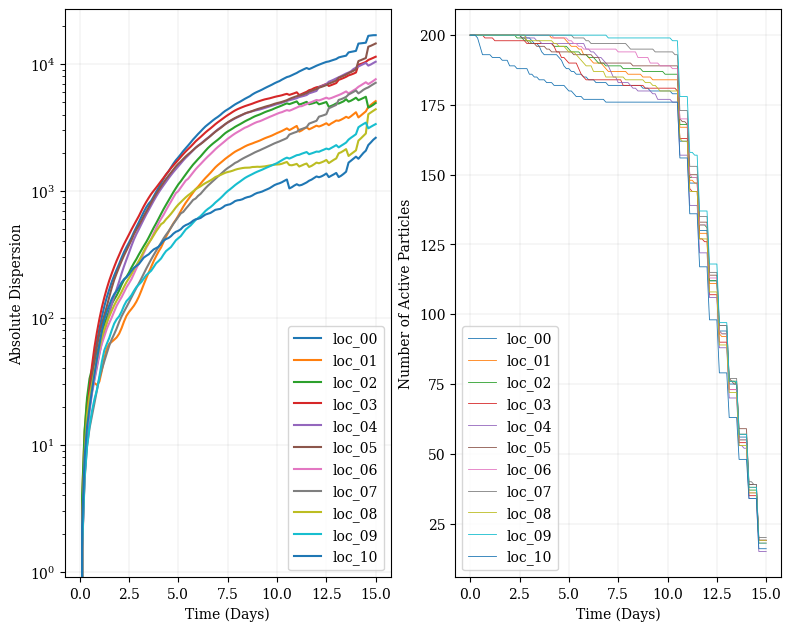

In [30]:
import pickle
from Lagrangian_Analyses.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

abs_dispersion_dict = pickle.load(open(f"{outdir}/AD_{id}.p", "rb"))

fig = plt.figure(figsize=(7.8, 6.2), constrained_layout=True)
ax = fig.add_subplot(1, 2, 1)

for location, items in abs_dispersion_dict.items():
    x = items["time_step"]
    y = items["AD_t"]
    ax.plot(x / 86400, y, label=location)

ax.set_ylabel("Absolute Dispersion")
ax.set_xlabel("Time (Days)")
ax.set_yscale("log")
ax.grid(axis="both", which="major", color="k", linestyle="-", linewidth=0.05)
ax.legend()

ax2 = fig.add_subplot(1, 2, 2)
for location, items in abs_dispersion_dict.items():
    x = items["time_step"]
    y = items["Number_of_Particles"]
    ax2.plot(x / 86400, y, lw=0.6, label=location)

ax2.set_ylabel("Number of Active Particles")
ax2.set_xlabel("Time (Days)")
ax2.grid(axis="both", which="major", color="k", linestyle="-", linewidth=0.05)
ax2.legend()

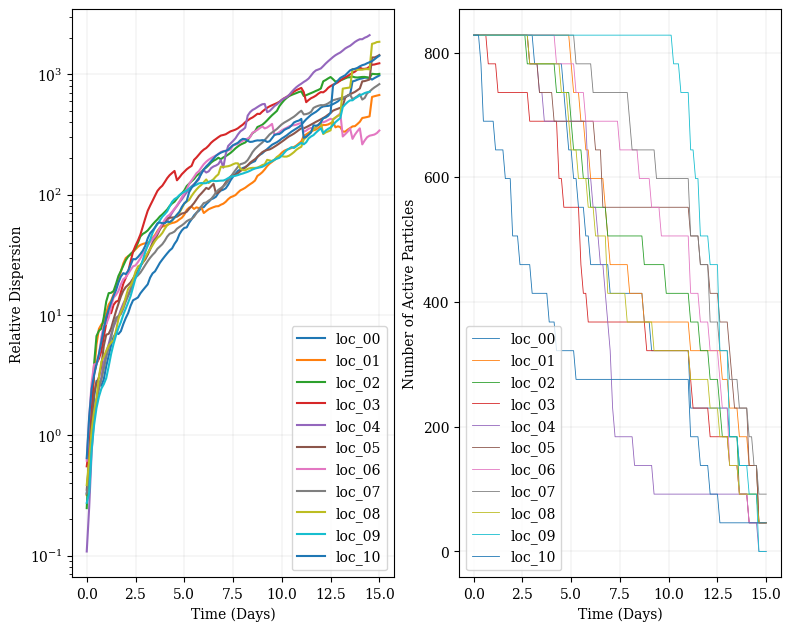

In [28]:
import pickle
from Lagrangian_Analyses.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

rel_dispersion_dict = pickle.load(open(f"{outdir}/RD_{id}.p", "rb"))

fig = plt.figure(figsize=(7.8, 6.2), constrained_layout=True)
ax = fig.add_subplot(1, 2, 1)

for location, items in rel_dispersion_dict.items():
    x = items["time_step"]
    y = items["RD_t"]
    ax.plot(x / 86400, y, label=location)

ax.set_ylabel("Relative Dispersion")
ax.set_xlabel("Time (Days)")
ax.set_yscale("log")
ax.grid(axis="both", which="major", color="k", linestyle="-", linewidth=0.05)
ax.legend()

ax2 = fig.add_subplot(1, 2, 2)
for location, items in rel_dispersion_dict.items():
    x = items["time_step"]
    y = items["Number_of_Particle_Pairs"]
    ax2.plot(x / 86400, y, label=location, lw=0.6)

ax2.set_ylabel("Number of Active Particles")
ax2.set_xlabel("Time (Days)")
ax2.grid(axis="both", which="major", color="k", linestyle="-", linewidth=0.05)
ax2.legend()